In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image

# Define the path to your dataset
data_root = r"C:\Users\Megat\Downloads\DownloadImages\images"

# Define image size
IMAGE_SHAPE = (224, 224)

# Define the training and validation data directories
TRAINING_DATA_DIR = str(data_root)


In [2]:
# Data augmentation and preprocessing for training and validation
datagen_kwargs = dict(rescale=1./255, validation_split=.20)
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)

# Create data generators for training and validation
train_generator = train_datagen.flow_from_directory(
    TRAINING_DATA_DIR,
    subset="training",
    shuffle=True,
    target_size=IMAGE_SHAPE
)

valid_generator = valid_datagen.flow_from_directory(
    TRAINING_DATA_DIR,
    subset="validation",
    shuffle=True,
    target_size=IMAGE_SHAPE
)


Found 6472 images belonging to 78 classes.
Found 1575 images belonging to 78 classes.


In [3]:
# Define class labels
dataset_labels = train_generator.class_indices.keys()

# Load EfficientNetB0 model without the top layer
base_model = tf.keras.applications.EfficientNetB0(
    weights='imagenet', 
    include_top=False, 
    input_shape=(224, 224, 3)
)

# Add custom classification layers on top of EfficientNetB0
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
predictions = tf.keras.layers.Dense(len(dataset_labels), activation='softmax')(x)

# Create the final model
model = tf.keras.Model(inputs=base_model.input, outputs=predictions)

# Freeze base layers during initial training
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=10, verbose=1,
                    validation_data=valid_generator)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Epoch 1/10


C:\Users\Megat\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 16/203 ━━━━━━━━━━━━━━━━━━━━ 55s 296ms/step - accuracy: 0.0109 - loss: 4.3642

C:\Users\Megat\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


203/203 ━━━━━━━━━━━━━━━━━━━━ 80s 366ms/step - accuracy: 0.0105 - loss: 4.3653 - val_accuracy: 0.0133 - val_loss: 4.3565
Epoch 2/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 70s 344ms/step - accuracy: 0.0127 - loss: 4.3579 - val_accuracy: 0.0133 - val_loss: 4.3563
Epoch 3/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 70s 342ms/step - accuracy: 0.0141 - loss: 4.3572 - val_accuracy: 0.0140 - val_loss: 4.3563
Epoch 4/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 70s 343ms/step - accuracy: 0.0137 - loss: 4.3568 - val_accuracy: 0.0140 - val_loss: 4.3559
Epoch 5/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 70s 342ms/step - accuracy: 0.0130 - loss: 4.3564 - val_accuracy: 0.0140 - val_loss: 4.3560
Epoch 6/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 70s 341ms/step - accuracy: 0.0157 - loss: 4.3562 - val_accuracy: 0.0140 - val_loss: 4.3561
Epoch 7/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 70s 340ms/step - accuracy: 0.0130 - loss: 4.3568 - val_accuracy: 0.0140 - val_loss: 4.3561
Epoch 8/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 70s 341ms/step - accuracy: 0.0149 - loss: 4.3560 - val

In [4]:
# Fine-tune the model by unfreezing some layers
for layer in model.layers[:100]:
    layer.trainable = False
for layer in model.layers[100:]:
    layer.trainable = True

# Compile the model for fine-tuning
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Fine-tune the model
history_fine_tune = model.fit(train_generator, epochs=10, verbose=1,
                              validation_data=valid_generator)


Epoch 1/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 146s 675ms/step - accuracy: 0.0136 - loss: 4.4421 - val_accuracy: 0.0133 - val_loss: 4.3920
Epoch 2/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 133s 652ms/step - accuracy: 0.0134 - loss: 4.4121 - val_accuracy: 0.0089 - val_loss: 4.4163
Epoch 3/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 132s 648ms/step - accuracy: 0.0110 - loss: 4.3800 - val_accuracy: 0.0102 - val_loss: 4.3982
Epoch 4/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 136s 665ms/step - accuracy: 0.0155 - loss: 4.3794 - val_accuracy: 0.0089 - val_loss: 4.3967
Epoch 5/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 134s 658ms/step - accuracy: 0.0239 - loss: 4.3561 - val_accuracy: 0.0095 - val_loss: 4.3912
Epoch 6/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 133s 649ms/step - accuracy: 0.0232 - loss: 4.3497 - val_accuracy: 0.0140 - val_loss: 4.3900
Epoch 7/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 132s 648ms/step - accuracy: 0.0200 - loss: 4.3451 - val_accuracy: 0.0140 - val_loss: 4.3914
Epoch 8/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 133s 652ms/step - accuracy: 0.0216 -

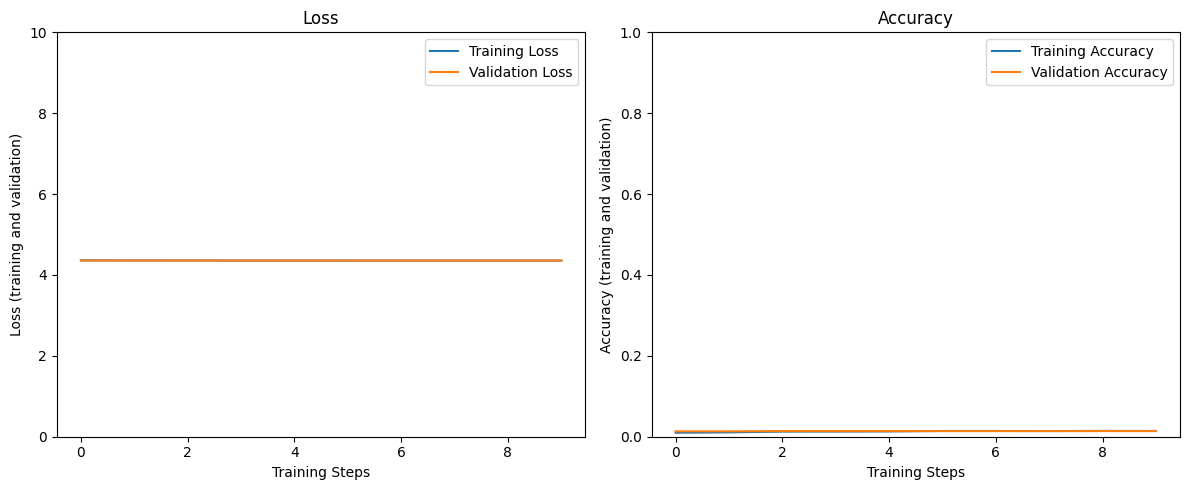

In [5]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot Loss
ax1.set_title('Loss')
ax1.set_ylabel('Loss (training and validation)')
ax1.set_xlabel('Training Steps')
ax1.set_ylim([0, 10])
ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.legend()

# Plot Accuracy
ax2.set_title('Accuracy')
ax2.set_ylabel('Accuracy (training and validation)')
ax2.set_xlabel('Training Steps')
ax2.set_ylim([0, 1])
ax2.plot(history.history['accuracy'], label='Training Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax2.legend()

plt.tight_layout()
plt.show()


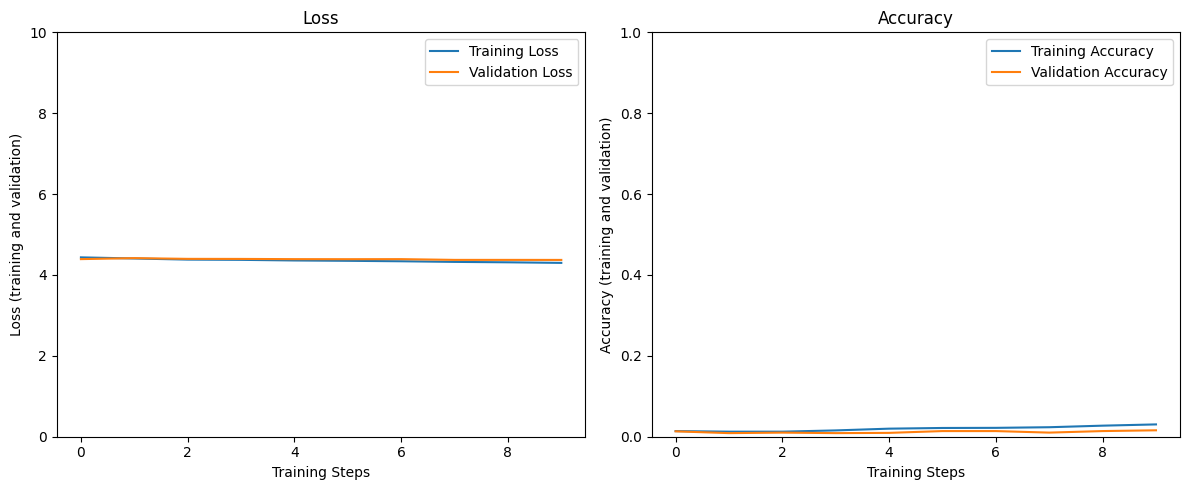

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot Loss
ax1.set_title('Loss')
ax1.set_ylabel('Loss (training and validation)')
ax1.set_xlabel('Training Steps')
ax1.set_ylim([0, 10])
ax1.plot(history_fine_tune.history['loss'], label='Training Loss')
ax1.plot(history_fine_tune.history['val_loss'], label='Validation Loss')
ax1.legend()

# Plot Accuracy
ax2.set_title('Accuracy')
ax2.set_ylabel('Accuracy (training and validation)')
ax2.set_xlabel('Training Steps')
ax2.set_ylim([0, 1])
ax2.plot(history_fine_tune.history['accuracy'], label='Training Accuracy')
ax2.plot(history_fine_tune.history['val_accuracy'], label='Validation Accuracy')
ax2.legend()

plt.tight_layout()
plt.show()